<a href="https://colab.research.google.com/github/Rushabhbhagat08/OIBSIP/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<u>Project name:</u>** SALES PREDICTION USING PYTHON

##**Problem statments**
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

**GitHub Link:**

# ***Let's Begin !***

## ***1. Know Your Data***

###Import liberies

In [49]:
# import required liberies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import  mean_absolute_error,mean_squared_error, r2_score,accuracy_score

### Dataset Loading

In [50]:
# import our dataset in csv format
sales_pred=pd.read_csv("/content/drive/MyDrive/Oasis Infobyte/SALES PREDICTION USING PYTHON/Advertising.csv")

### Dataset First View

In [51]:
# see the first five rows in the dataset
sales_pred.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
# see the last five rows in the dataset
sales_pred.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


###renaming the column

In [53]:
# Renaming the first column "Unnamed" as "Index"
sales_pred.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

### Dataset Rows & Columns count

In [54]:
# check shape of the dataset
column=sales_pred.shape[0]
rows=sales_pred.shape[1]
print(f'There are {column} Columns and {rows} Rows in the dataset')

There are 200 Columns and 5 Rows in the dataset


### Dataset Information

In [55]:
#information of the dataset
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


###Missing Values/Null Values

In [56]:
#check the null values present in the dataset
sales_pred.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There  doest not any null or missing values in the dataset.

## ***2. Understanding Your Variables***

In [57]:
# described the dataset
sales_pred.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [58]:
# see the varibles in the dataset
sales_pred.columns

Index(['Index', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Variables Description

## **3. Data Vizualization**

<Axes: >

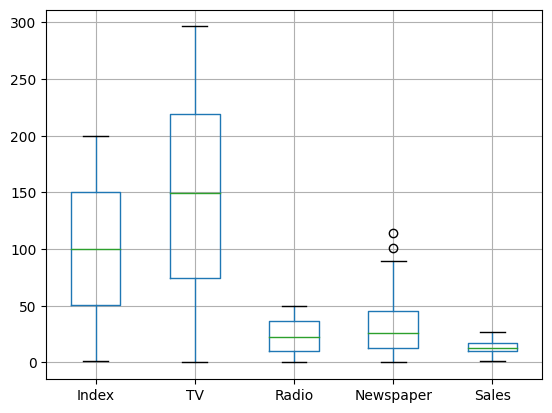

In [59]:
# draw the boxplot
sales_pred.boxplot()

There are two outliers in the dataset, in Newspaper columns the two values is grater then 100.

In [60]:
# see the outliers in the dataset
sales_pred[sales_pred.Newspaper>100]

,Index,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


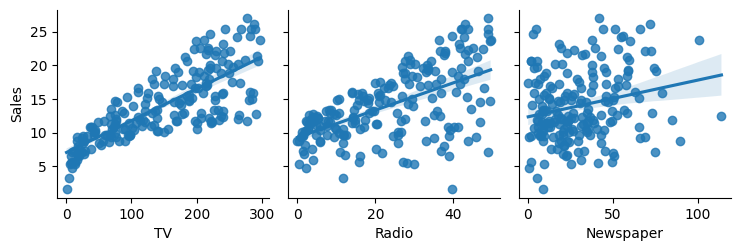

In [61]:
# Identifying correlations & patterns between independent variables(TV, Radio, Newspaper) & dependent variable(Sales):
sns.pairplot(sales_pred, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

<Axes: >

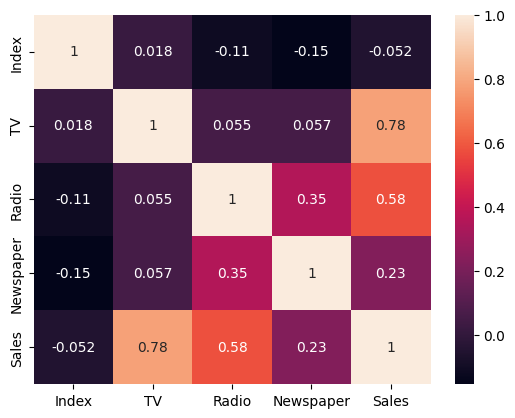

In [62]:
#plot correletion heatmap
sns.heatmap(sales_pred.corr(),annot=True)

## ***4. ML Model Implementation***

In [63]:
# Assigning (TV,Radio,Newspaper) as features to "X" by dropping column 'Index' & 'Sales' from the dataset:
# Here TV, Radio, Newspaper are independent variables:
X = sales_pred.drop(['Index','Sales'], axis=1)
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [64]:
# Assigning 'Sales' as a target to "y":
# Here Sales is the dependent variable which is dependent on TV, Radio, Newspaper:
y = sales_pred['Sales']
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


##Split the Data Into Train and Test Datasets

In [73]:
# split the datastet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

##**Logistic regression**

In [66]:
# implement logistic regression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
# Making predictions(y_predictions) based on the test data(X_test):
y_pred = model.predict(X_test)
y_pred

array([ 8.54034679, 15.57247463, 12.00612144,  9.67279861, 11.42385092,
       18.55293488, 24.02278242,  7.05365828, 22.12551494, 16.72065638,
        7.85081793, 23.11509395, 19.18719498,  5.40127091, 15.23576551,
        9.90642579, 11.94342451,  9.81855823, 21.14401409,  9.1534307 ,
       20.44468759, 12.29808365, 13.5869414 , 10.57031008, 16.26513055,
        7.86253245, 20.69472029, 20.35016487,  9.00527669, 14.11934464,
       17.20367735, 15.11272068, 17.23013018, 19.08466691, 17.13277712,
       12.31707038, 12.73960467,  6.07982336, 10.01695956, 13.32737828])

In [68]:
# intercept of linear regression model
print(model.intercept_)
print(model.coef_)

2.9846602797373514
[ 0.04536767  0.18669444 -0.00052201]


In [78]:
# Evaluating the model for it's accuracy:
print ("Validation Score : ", model.score(X_test, y_test)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred)*100)

Validation Score :  92.86102071081018
Mean Absolute Error: 1.1579489313567057
Root Mean Squared Error: 1.4335357663627921
R-squared: 92.86102071081018


In [69]:
# see the actual and predicted values
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})
act_predict.head(20)

,Actual,Predict
0,5.5,8.540347
1,14.7,15.572475
2,13.4,12.006121
3,11.0,9.672799
4,11.8,11.423851
5,15.9,18.552935
6,26.2,24.022782
7,8.6,7.053658
8,24.7,22.125515
9,15.7,16.720656


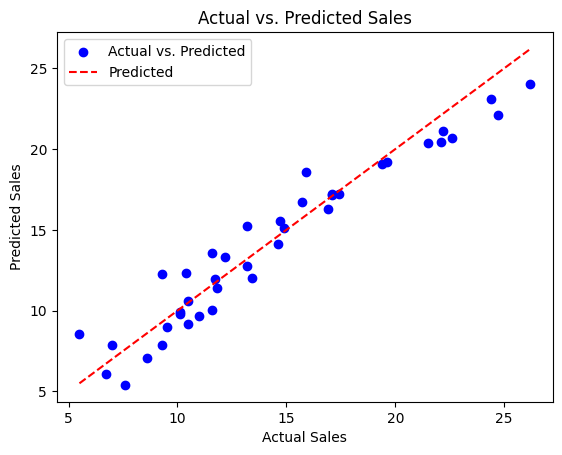

In [71]:
# Scatter plot of the actual sales values against the predicted values:
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

# **5. Conclusion**

* The accuracy score of the model is 92.86% so, the linear regression model performance well.
* The R2 score is 92% is almost near to 1.
* The scatter plot shows the positive correlation.
* we have to found 2 outliers in the dataset which is the newspaper column value is grater then 100.

### ***Hurrah! You have successfully completed Sales Prediction Using Python Project !!!***